In [2]:
!pip install supabase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.6/842.6 kB 10.0 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached h2-4.3.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached hyperframe-6.1.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached hpack-4.1.0-py3-none-any.whl.metadata (4.6 kB)
Using cached h2-4.3.0-py3-none-any.whl (61 kB)
Using cached hpack-4.1.0-py3-none-any.whl (34 kB)
Using cached hyperframe-6.1.0-py3-none-any.whl (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.6 MB/s  0:00:00
  Created wheel for pyiceberg: filename=pyiceberg-0.10.0-cp313-cp313-manylinux_2_39_x86_64.whl size=632945 sha256=8f9a2939c26efe177022213f5dd10f7ce54b34ea00e85a79537c818016c4b9cc
  Stored in directory: /home/douglas/.cache/pip/wheels/94/e1/ad/72718f6a4b508a4dcd74f62431dc44240ca3518c3837f58600
Successfully built pyiceberg
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23/2

In [2]:
!pip install pandas sqlalchemy psycopg2-binary

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import json

In [18]:
# Substitua pelos dados que você pegou no "Project Settings > Database" do Supabase
USER = 'postgres'
PASSWORD = '_xs#hiUAWeN6LMK'
HOST = 'db.pthfxmypcxqjfstqwokf.supabase.co'
PORT = '5432'
DBNAME = 'postgres'

# Cria a string de conexão
url_conexao = f'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}'
engine = create_engine(url_conexao)

# Lê a tabela inteira diretamente para o Pandas

query = "SELECT * FROM hrv_sessions"
df = pd.read_sql(query, engine)

# Agora o 'df' contém todos os dados, sem os "..."
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    14 non-null     object             
 1   created_at            14 non-null     datetime64[ns, UTC]
 2   device_id             14 non-null     object             
 3   session_index         14 non-null     int64              
 4   timestamp_device_min  14 non-null     int64              
 5   fc_mean               9 non-null      float64            
 6   sdnn                  9 non-null      float64            
 7   rmssd                 9 non-null      float64            
 8   pnn50                 9 non-null      float64            
 9   rr_valid_count        9 non-null      float64            
 10  tags                  0 non-null      object             
 11  rrr_intervals_ms      0 non-null      object             
 12  ir_wavefor

In [19]:
print(df.ir_waveform)

0     [13303, 13310, 13233, 13338, 13314, 13325, 133...
1     [47443, 47450, 47512, 47490, 47535, 47542, 475...
2     [33925, 33932, 33930, 33936, 33926, 33922, 340...
3     [38735, 38729, 46713, 46711, 46707, 46696, 466...
4     [40683, 40697, 40712, 40712, 40725, 40714, 406...
5     [42887, 42885, 42909, 42922, 42900, 42877, 430...
6     [41799, 41807, 45852, 45855, 45869, 46011, 460...
7     [45428, 45405, 45079, 45026, 45035, 44919, 448...
8     [50689, 50692, 50706, 50713, 50672, 50685, 507...
9     [45394, 45403, 45379, 45359, 45342, 45399, 453...
10    [34060, 34060, 34058, 34057, 34090, 34049, 340...
11    [5956, 5951, 5968, 5967, 5960, 5976, 5975, 597...
12    [10132, 10137, 10188, 10213, 10227, 10236, 102...
13    [18251, 18256, 18268, 18267, 18276, 18248, 183...
Name: ir_waveform, dtype: object


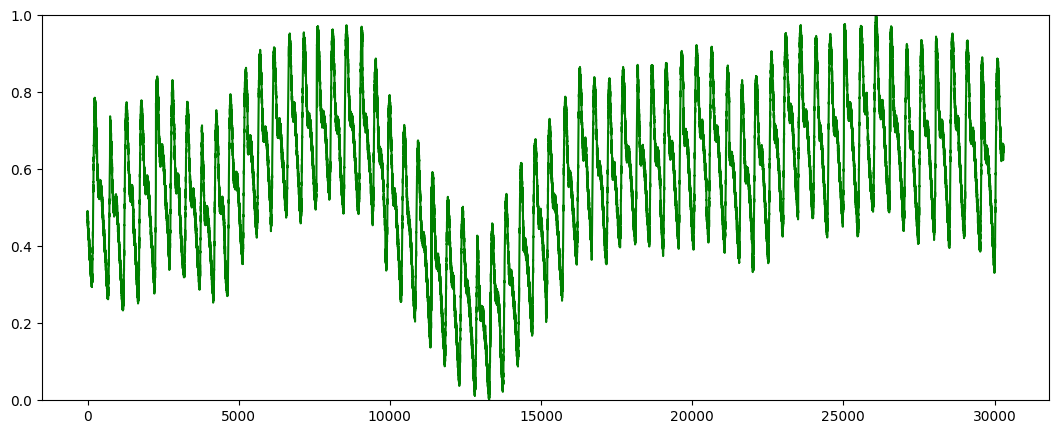

In [28]:
# 1. Seleciona os dados da mesma linha para ambos os LEDs
sinal_ir = df['ir_waveform'].iloc[13]
sinal_red = df['red_waveform'].iloc[11]


# 1. Normaliza (Transforma a escala para 0 até 1)
ir_norm = (sinal_ir - np.min(sinal_ir)) / (np.max(sinal_ir) - np.min(sinal_ir))
red_norm = (sinal_red - np.min(sinal_red)) / (np.max(sinal_red) - np.min(sinal_red))


# Inverte o sinal para que o batimento aponte para cima
ir_invertido = np.max(ir_norm) - ir_norm
red_invertido = np.max(red_norm) - red_norm

# 2. Cria o gráfico
plt.figure(figsize=(13, 5))

# Ajuste da escala (Como você tem dois sinais, talvez precise ampliar o range)
plt.ylim(0,1)

# 2. Agora o Plot (Lembre-se de remover o plt.ylim antigo)
plt.plot(ir_invertido[7580:], color='green', label='IR Normalizado')
#plt.plot(red_invertido[7580:], color='red', label='RED Normalizado')

#### 